# MNIST Data-set

### Victor Nascimento Ribeiro - 10/2022

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.regularizers import l2
import numpy as np

## Download MNIST

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Without convolution

## Building NN

In [ ]:
model = Sequential([
    Dense(units=256, input_shape=(28*28,), activation='relu'),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy', # not one-hot ecoded
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images,
          train_labels,
          epochs=15,
          batch_size=128,
          verbose=1,
          validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.8181 - accuracy: 0.8337 - val_loss: 0.4288 - val_accuracy: 0.9399
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.9339 - val_loss: 0.3478 - val_accuracy: 0.9539
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3478 - accuracy: 0.9531 - val_loss: 0.3028 - val_accuracy: 0.9621
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2992 - accuracy: 0.9608 - val_loss: 0.2776 - val_accuracy: 0.9643
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2619 - accuracy: 0.9672 - val_loss: 0.2505 - val_accuracy: 0.9680
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2305 - accuracy: 0.9730 - val_loss: 0.2290 - val_accuracy: 0.9710
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2072 - accuracy: 0.9763 - val_loss: 0.2132 - val_accuracy: 0.9712
Epoch 

## Testing

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1331 - accuracy: 0.9776


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9775999784469604


In [ ]:
prediction = model.predict(x=test_images, batch_size=128, verbose=0)

## Results

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

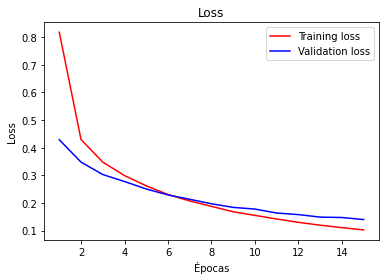

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, c='red', label='Training loss')
plt.plot(epochs, val_loss, c='blue', label='Validation loss')
plt.title('Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()

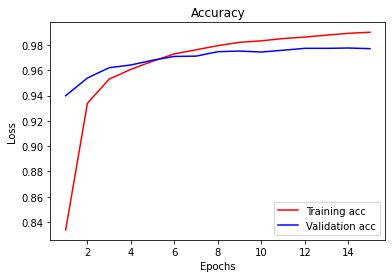

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, c='red', label='Training acc')
plt.plot(epochs, val_acc, c='blue', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## CNN

In [ ]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Building CNN

In [ ]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)), # strides vem por padrao igual o tamanho do kernel
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                 

## Training

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', # not one-hot ecoded
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images,
          train_labels,
          epochs=15,
          batch_size=128,
          verbose=1,
          validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 5s 11ms/step - loss: 0.8121 - accuracy: 0.8201 - val_loss: 0.3219 - val_accuracy: 0.9553
Epoch 2/15
375/375 [==============================] - 4s 11ms/step - loss: 0.3014 - accuracy: 0.9559 - val_loss: 0.2377 - val_accuracy: 0.9734
Epoch 3/15
375/375 [==============================] - 4s 11ms/step - loss: 0.2371 - accuracy: 0.9696 - val_loss: 0.2047 - val_accuracy: 0.9787
Epoch 4/15
375/375 [==============================] - 4s 11ms/step - loss: 0.2024 - accuracy: 0.9768 - val_loss: 0.1815 - val_accuracy: 0.9822
Epoch 5/15
375/375 [==============================] - 4s 10ms/step - loss: 0.1823 - accuracy: 0.9794 - val_loss: 0.1647 - val_accuracy: 0.9842
Epoch 6/15
375/375 [==============================] - 4s 11ms/step - loss: 0.1642 - accuracy: 0.9828 - val_loss: 0.1514 - val_accuracy: 0.9856
Epoch 7/15
375/375 [==============================] - 4s 11ms/step - loss: 0.1488 - accuracy: 0.9846 - val_loss: 0.1443 - val_accuracy: 0.9851

## Testing

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9904


In [ ]:
print('test_acc:', test_acc) 

test_acc: 0.9904000163078308


In [ ]:
prediction = model.predict(x=test_images, batch_size=128, verbose=0)

## Results

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

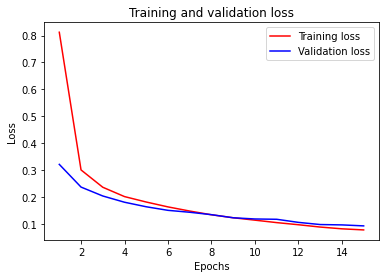

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, c='red', label='Training loss')
plt.plot(epochs, val_loss, c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

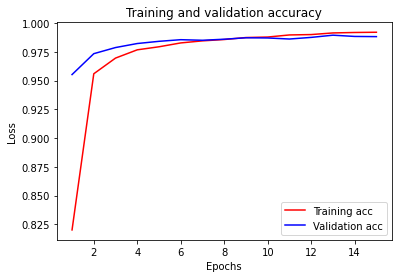

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, c='red', label='Training acc')
plt.plot(epochs, val_acc, c='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()